# INVESTIGATING FANDANGO MOVIE RATING#

This short project aims to investigate the discrepancies showcased on the fandango movie website concerning the ratings of films used to help impending viewers make selection.
This project aims to determine if there has been any change in fandango's rating system after Hickey's analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
fs = pd.read_csv('fandango_score_comparison.csv')
mv = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
print(fs.columns)
print(mv.columns)

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')
Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')


In [4]:
print(fs.isnull().sum())
print(mv.isnull().sum())

FILM                          0
RottenTomatoes                0
RottenTomatoes_User           0
Metacritic                    0
Metacritic_User               0
IMDB                          0
Fandango_Stars                0
Fandango_Ratingvalue          0
RT_norm                       0
RT_user_norm                  0
Metacritic_norm               0
Metacritic_user_nom           0
IMDB_norm                     0
RT_norm_round                 0
RT_user_norm_round            0
Metacritic_norm_round         0
Metacritic_user_norm_round    0
IMDB_norm_round               0
Metacritic_user_vote_count    0
IMDB_user_vote_count          0
Fandango_votes                0
Fandango_Difference           0
dtype: int64
movie           0
year            0
metascore       0
imdb            0
tmeter          0
audience        0
fandango        0
n_metascore     0
n_imdb          0
n_tmeter        0
n_audience      0
nr_metascore    0
nr_imdb         0
nr_tmeter       0
nr_audience     0
dtype: int64


Both data are devoid of null values

In [5]:
print(fs.describe())
print(mv.describe())

       RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  \
count      146.000000           146.000000  146.000000       146.000000   
mean        60.849315            63.876712   58.808219         6.519178   
std         30.168799            20.024430   19.517389         1.510712   
min          5.000000            20.000000   13.000000         2.400000   
25%         31.250000            50.000000   43.500000         5.700000   
50%         63.500000            66.500000   59.000000         6.850000   
75%         89.000000            81.000000   75.000000         7.500000   
max        100.000000            94.000000   94.000000         9.600000   

             IMDB  Fandango_Stars  Fandango_Ratingvalue     RT_norm  \
count  146.000000      146.000000            146.000000  146.000000   
mean     6.736986        4.089041              3.845205    3.042466   
std      0.958736        0.540386              0.502831    1.508440   
min      4.000000        3.000000       

In [6]:
fs_before =fs[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [7]:
mv_after = mv[['movie', 'year', 'fandango']]

The population of interest is to investigate movie rating 
associated with fandango, so we isolate columns in the data
that has to do with fandango ratings.

The movie sampling isn't random as it has some criterias were 
considered(Hickey's data) such as : 

* Number of User Rating must be 30 and above.
* Movie ticket must be on sale by 2015.
           
For the second dataset :

* Movie must have been released in 2016 or later.
* Must have considerable number of reviews and votes.

The sample are not represntative of the population of interest as the compilers of the dataset have different question which is different from our own intention in mind.





## changing our aim ##
However, using the dataset we can determine if there is any change in fandango's rating of popular movies in 2015 and the published ratings in 2016.

NB: Here, we say a movie is 'popular' in this project if it has 30 or more fan rating

The second dataset however doesn't provide any information about number of fan rating
so we can sample randomly and check up the movie's number of fan 
rating on the fandango website so as to ensure good representativity.

In [8]:
mv_after.sample(10, random_state=100)

,movie,year,fandango
117,Morgan,2016,3.5
163,The Boss,2016,3.5
145,Skiptrace,2016,3.5
134,Pride and Prejudice and Zombies,2016,4.0
112,Misconduct,2016,3.0
74,I.T.,2016,3.5
126,Office Christmas Party,2016,3.5
65,Hacksaw Ridge,2016,4.5
181,The Infiltrator,2016,4.0
110,Mike and Dave Need Wedding Dates,2016,4.0


Looking up the number of fan user rating on the fandango website,
90% of the movies were popular, so we can proceed

Lets also ensure that **'fs_before'** dataset also contains movies with
number of user rating greater than 30

In [9]:
(fs_before['Fandango_votes'] < 30).sum()

0

In [10]:
fs_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


## EXTRACTING YEAR OF MOVIE ##

In [11]:
fs_before['Year'] = fs_before['FILM'].str[-5:-1]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
fs_before.head(1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015


In [13]:
fs_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [14]:
fs_2015 = fs_before[fs_before['Year'] == '2015']

In [15]:
fs_2015.shape

(129, 6)

In [16]:
mv_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [17]:
mv_2016 = mv_after[mv_after['year'] == 2016]

In [18]:
mv_2016.shape

(191, 3)

## COMPARING SHAPE OF THE DISTRIBUTION BY YEAR ##

We are about to compare fandango's rating in 2015 and 2016 
and ultimately determinetif there is any significant difference

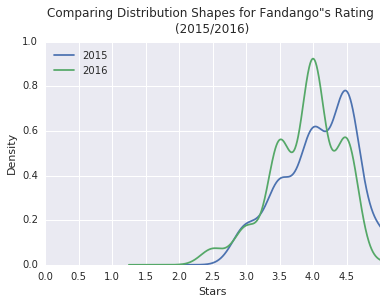

In [33]:
%matplotlib inline
#plt.style.use('fivethirtyeight')
fs_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
mv_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title('Comparing Distribution Shapes for Fandango"s Rating \n(2015/2016)',
          y=1.02) #y pushes the title upward
plt.xlim(0,5)
plt.xlabel('Stars')
plt.xticks(np.arange(0,5,0.5))
plt.show()

Visualizing the shapes of both distribution, They possess similar shape
and are negatively skewed.

However, the 2016 distribution shifted relatively to the left of
the 2015 distribution. 

This shows thst the 2016 rating of popular movies were 
slightly lower than that of 2015.


## EXAMINING THE RELATIVE FREQUENCY BY YEAR ##

For the sake of granularity

In [20]:
print ('2015')
print('-' * 15)

fs_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() *100

2015
---------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [21]:
print('2016' + '\n' + '-' * 16)
mv_2016['fandango'].value_counts(normalize=True).sort_index() *100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Less than 1% of popular movies had perfecr rating of 5.0 stars
in 2016 compared to about 7% in 2015.

There was about 13% decrease in the popular movie ratings which had 4.5 in
2015 to tht of 2016

None of the popular movies rated below 3.0 in 2015 while
3.1% rated 2.5 in 2016

These clearly shows a decrease in the ratings in 2016 to
that of 2015
    
    

## TAKING STATISTICAL METRICS ##

In [22]:
mean_2015 = fs_2015['Fandango_Stars'].mean()
mean_2016 = mv_2016['fandango'].mean()

median_2015 = fs_2015['Fandango_Stars'].median()
median_2016 = mv_2016['fandango'].median()

mode_2015 = fs_2015['Fandango_Stars'].mode()[0]
mode_2016 = mv_2016['fandango'].mode()[0]



In [23]:
stat = pd.DataFrame()
stat['2015'] = [mean_2015, median_2015, mode_2015]
stat['2016'] = [mean_2016, median_2016, mode_2016]

stat.index = ['mean', 'median', 'mode']

In [24]:
stat

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


The median value remains unchanged for both years, 
However, there is a difference in the mean and modal score, as
the scoresof 2015 are greater than that of 2016.

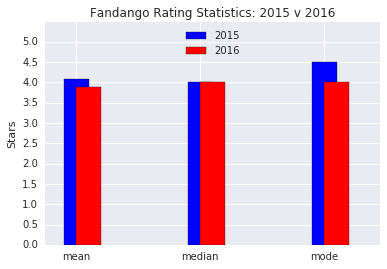

In [30]:
stat['2015'].plot.bar(color='blue', label='2015',align='center', width=0.2)
stat['2016'].plot.bar(color='red', label='2016', align='edge', width=0.2,rot=0)
plt.title('Fandango Rating Statistics: 2015 v 2016')
plt.ylabel('Stars')
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,0.5))
plt.legend(loc='upper center')
plt.show()

## CONCLUSION ##

From our analysis we could obviously see a slight difference in the
rating of popular movies for the year 2015 and 2016. While we could not wholly conclude the 
exact cause of the change/difference, we could say it is probably due 
to Hickey's analysis which prompted Fandango into fixing the bias in their 
movie rating system